# importing the required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf

In [5]:
dir_path = "C:/Users/prana/Projects/Bone_break_classification/data/Fracture classification" # Path of taining data

In [6]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
from keras.optimizers import *

## Importing the Dataset

In [7]:
# load the train data

train_data = tf.keras.utils.image_dataset_from_directory(
    dir_path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40
)

#load the test data
validation_data = tf.keras.utils.image_dataset_from_directory(
    dir_path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42
)

Found 6966 files belonging to 2 classes.
Using 6270 files for training.
Found 6966 files belonging to 2 classes.
Using 696 files for validation.


In [8]:
# Inspect class names
class_names = train_data.class_names
print("Class names:", class_names)

Class names: ['fractured', 'not_fractured']


In [9]:
className = glob(dir_path + '/*' )
numberOfClasses = len(className)
print("Number Of Class: ",numberOfClasses)

Number Of Class:  2


In [10]:
# data preprocessing
def preprocess(img):
    img = tf.cast(img, "float32") / 255.0
    return img

train_dataset = train_data.map(lambda x, y: (preprocess(x), y))
val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))

In [11]:
# get train data and labels
x_train = []
y_train = []

for images, labels in train_dataset:
    #append train data to x_train
    x_train.append(images.numpy())
    
    #append labels to y_train
    y_train.append(labels.numpy())
    
# concatenate all the batches to get the full list
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [12]:
# get val data and labels

x_val = []
y_val = []

for images, labels in val_dataset:
    #append train data to x_train
    x_val.append(images.numpy())
    
    #append labels to y_train
    y_val.append(labels.numpy())
    
# concatenate all the batches to get the full list
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [13]:
x_train.shape

(6270, 256, 256, 3)

In [14]:
NUM_CLASSES = len(class_names)

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(y_val, NUM_CLASSES)

## Model Training

In [15]:
model = tf.keras.Sequential([
    Conv2D(filters=32,kernel_size=(3,3),strides=2,padding="same",input_shape=(256,256, 3)),
    BatchNormalization(momentum=0.9),
    LeakyReLU(0.2),
    Dropout(rate=0.2),
    
    Conv2D(64,3,strides=2,padding="same"),
    BatchNormalization(momentum=0.9),
    LeakyReLU(0.2),
    Dropout(rate=0.2),
    
    Conv2D(128,3,strides=2,padding="same"),
    BatchNormalization(momentum=0.9),
    LeakyReLU(0.2),
    Dropout(rate=0.2),
    
    Conv2D(256,3,strides=2,padding="same"),
    BatchNormalization(momentum=0.9),
    LeakyReLU(0.2),
    
    Flatten(),
    BatchNormalization(momentum=0.9),

    Dense(units=numberOfClasses, activation="sigmoid")              # 10 nodes with sigmoid activation for binary classification
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 65536)          │       262,144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       131,074 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 783,554 (2.99 MB)

 Trainable params: 651,522 (2.49 MB)

 Non-trainable params: 132,032 (515.75 KB)

In [16]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy','Precision','Recall','AUC'])

In [17]:
# A callback  
earlystop = tf.keras.callbacks.EarlyStopping(
                           monitor='val_loss',       # which monitors the Validation loss
                           min_delta=0,              # and stops the training if the loss doesnt improve
                           patience=3,               # for 3 consecutive turns 
                           verbose=1,
                           restore_best_weights=True # and restores best weights
                           )

In [18]:
# fit the model, log the results
callbacks = [earlystop]
epochs = 10

history = model.fit(x_train,
            y_train,
            validation_data = (x_val, y_val),
            shuffle=True,
            batch_size=32,
            epochs = epochs,
            callbacks=callbacks)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 98s 470ms/step - AUC: 0.6692 - Precision: 0.6217 - Recall: 0.6213 - accuracy: 0.6248 - loss: 1.2368 - val_AUC: 0.8430 - val_Precision: 0.7768 - val_Recall: 0.7902 - val_accuracy: 0.7859 - val_loss: 0.9858
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 90s 458ms/step - AUC: 0.8184 - Precision: 0.7543 - Recall: 0.7524 - accuracy: 0.7565 - loss: 1.2929 - val_AUC: 0.8976 - val_Precision: 0.8177 - val_Recall: 0.8376 - val_accuracy: 0.8290 - val_loss: 0.7514
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 90s 459ms/step - AUC: 0.9016 - Precision: 0.8462 - Recall: 0.8508 - accuracy: 0.8501 - loss: 0.8722 - val_AUC: 0.9634 - val_Precision: 0.9174 - val_Recall: 0.9253 - val_accuracy: 0.9239 - val_loss: 0.3424
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 90s 459ms/step - AUC: 0.9580 - Precision: 0.9107 - Recall: 0.9092 - accuracy: 0.9153 - loss: 0.4206 - val_AUC: 0.9556 - val_Precision: 0.8993 - val_Recall: 0.8980 - val_accuracy: 0.9095 - val_loss: 0.4380
Epoch 5/10
196/196 ━

## Model evaluation

In [19]:
model.evaluate(x_val, y_val)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - AUC: 0.9815 - Precision: 0.9680 - Recall: 0.9513 - accuracy: 0.9580 - loss: 0.2027


[0.18401150405406952,
 0.9655172228813171,
 0.9665210843086243,
 0.954023003578186,
 0.9840096235275269]

In [20]:
# list all data in history
print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


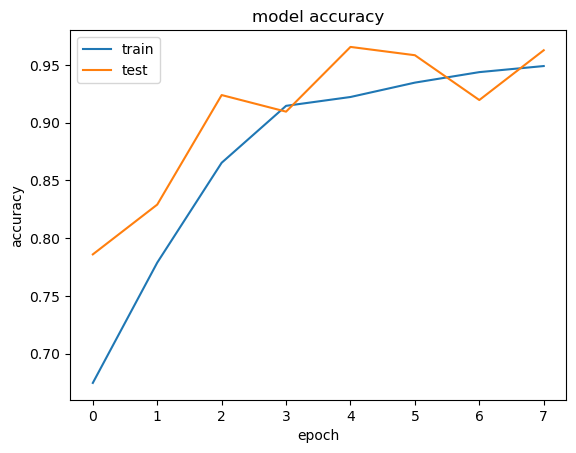

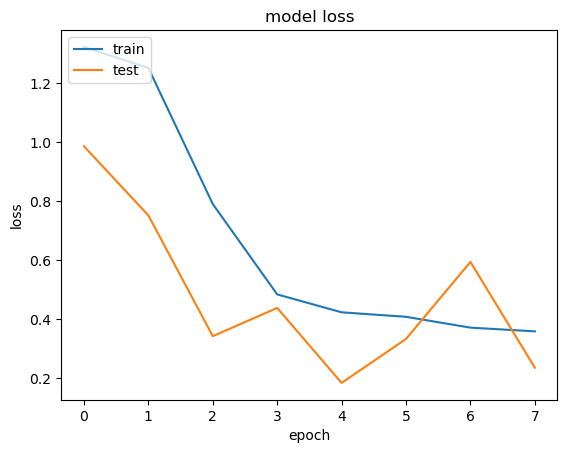

In [21]:
# summarize history for accuracy
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Custom predictions

In [22]:
preds = model.predict(x_val)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [23]:
CLASSES = np.array(class_names)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_val, axis=-1)]

In [24]:
def display_preds_act(n=8, figsize=(15,3)):
    
    indices = np.random.choice(range(len(y_val)), n)
    
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i, idx in enumerate(indices):
        img = x_val[idx]
        ax = fig.add_subplot(1, n, i + 1)
        ax.axis("off")
        ax.text(0.5, -0.35, "pred = " + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.text(0.5, -0.7, "act = " + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.imshow(img)


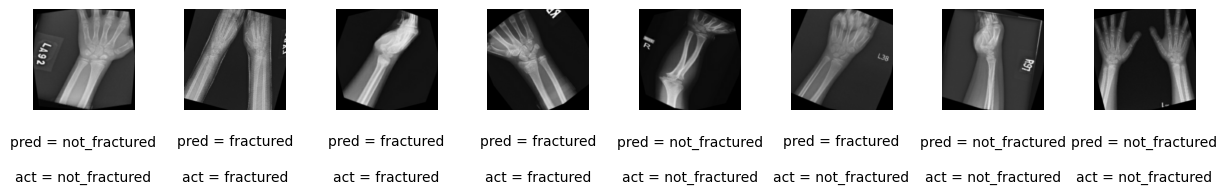

In [25]:
display_preds_act()

In [26]:
# A custorm prediction function that 
def predict_func(img):
    plt.figure(figsize=(6,4))                          # plots the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))   # as a coloured figure
    img = cv2.resize(img, (256, 256))                  
    img = np.reshape(img, [-1, 256, 256,3])            # resizes it to fit the input layer of our classifier model
    result = model.predict(img)                        # and predicts using the model
    print(f"The bone in image is -> {CLASSES[np.argmax(result, axis=-1)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The bone in image is -> ['fractured']


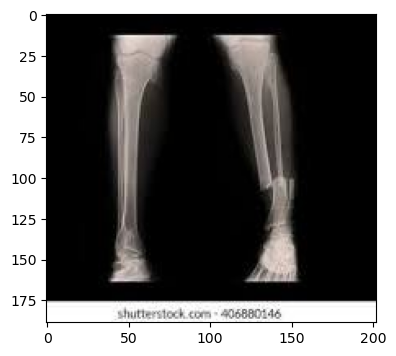

In [28]:
test_img = cv2.imread("C:/Users/prana/Downloads/fracture_image1.jpeg")
predict_func(test_img)  

1/1 [==============================] - 0s 35ms/step
The bone in image is -> ['not_fractured']


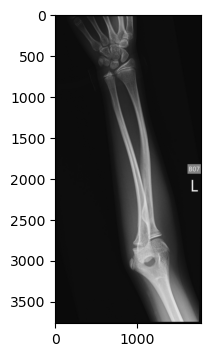

In [51]:
test_img = cv2.imread("C:/Users/prana/Projects/Bone_break_classification/data/Fracture classification/not_fractured/9.jpg ")
predict_func(test_img)

##### Saving the model

In [52]:
# save the model in a binary format
import os
import joblib

if not os.path.exists("C:/Users/prana/Projects/Bone_break_classification/model "):
    os.mkdir("C:/Users/prana/Projects/Bone_break_classification/model")
joblib.dump(model,"C:/Users/prana/Projects/Bone_break_classification/model/bin_C_model.pkl")
print("Successfully Completed !")

Successfully Completed !
